## Application du clustering au données biométriques de frappe

In [157]:
import numpy as np
from sklearn.cluster import  KMeans
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

raw = np.loadtxt("KeyboardData1.csv",dtype='str',delimiter=',')
data = raw[1:,1:].astype(float)
variables = raw[1, :]
individus = raw[1:, 0].astype(int)

In [158]:
print(np.shape(data))
print(len(individus))

(19176, 21)
19176


### Standardise

In [159]:
scaler = StandardScaler()
std_data = scaler.fit_transform(data)

### Selection des 10 premiers individus

In [172]:
data_sample = std_data[0:2634, :]
individus_sample = individus[0:2634]

### ACP

In [164]:
reduced_data = PCA(n_components=2).fit_transform(data_sample)
np.shape(reduced_data)

(2634, 2)

### Réalisation du clustering

On choisit 10 personnes (donc 10 clusters) pour rendre la représentation graphique visible

In [165]:
k_means = KMeans(init='k-means++', n_clusters=10, n_init=10)
k_means.fit(reduced_data)

KMeans(n_clusters=10)

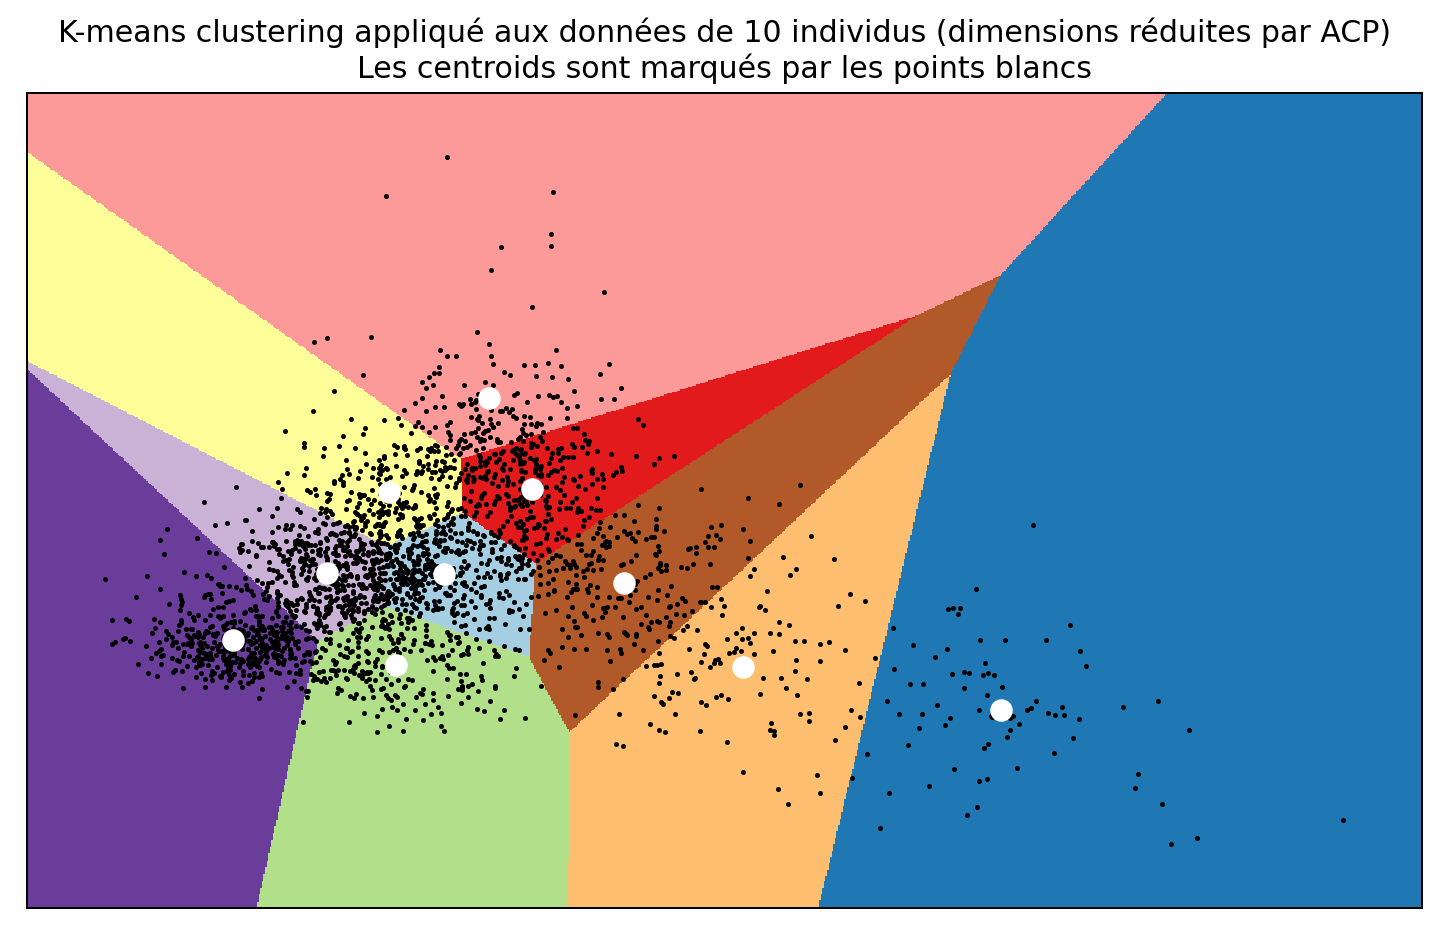

In [166]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(num = 1, figsize = (10, 6), dpi=180)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids
centroids = k_means.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], linewidths=3, color = "w", zorder=10)
plt.title("K-means clustering appliqué aux données de 10 individus (dimensions réduites par ACP)\n"
          "Les centroids sont marqués par les points blancs")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [167]:
clusters = k_means.predict(reduced_data)
print(clusters[0:400])

[3 8 4 3 8 8 3 8 0 8 8 8 8 3 0 8 8 8 8 8 8 8 8 8 8 8 8 8 8 6 8 8 8 8 8 6 8
 8 8 0 8 8 8 8 8 8 8 4 6 8 8 6 6 6 8 6 8 6 6 8 8 8 8 8 8 8 6 6 8 6 6 8 6 6
 6 6 0 8 6 8 6 8 6 8 6 6 8 8 6 8 8 8 8 8 8 6 6 6 6 6 8 6 8 6 6 6 8 2 6 6 8
 6 6 6 6 6 6 6 8 8 8 6 8 6 8 8 8 8 8 6 6 8 8 8 8 0 6 8 8 0 0 6 6 6 6 6 6 6
 0 0 6 6 6 0 6 6 6 6 6 0 0 6 6 0 6 6 6 6 0 6 0 0 8 0 8 6 0 6 0 6 0 0 8 0 8
 0 6 0 6 6 7 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 8 6 6 6 6 8 6 6 6 6 6 8 8 6 6 0
 8 8 8 6 8 8 6 6 8 0 0 8 8 6 6 6 6 6 6 6 6 6 6 8 6 6 6 6 6 8 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 8 6 6 6 6 6 6 0 6 8 6 6 6 6 6 6 0 8 6 6 6 6
 8 0 6 6 0 0 6 0 6 0 0 6 6 6 8 6 0 0 8 0 6 6 0 0 4 8 0 8 6 6 0 2 6 9 9 4 9
 9 9 9 9 5 9 9 9 9 0 9 5 9 9 9 0 9 9 0 9 9 9 9 9 9 9 5 9 9 4 9 4 9 9 5 9 5
 9 0 9 9 9 9 0 4 9 4 4 4 4 0 4 9 9 9 9 9 0 9 4 4 0 4 9 9 9 9]


### Inertie

Text(0.5, 1.0, 'Inerties en %')

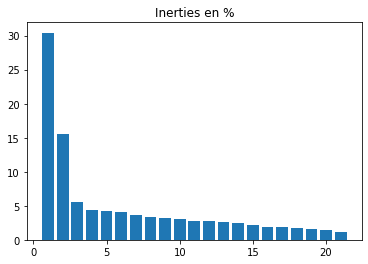

In [168]:
# Inerties
plt.figure()
(U,D,VT) = np.linalg.svd(std_data,full_matrices=False)
plt.bar(np.arange(np.shape(D)[0])+1,100*D**2/sum(D**2)) #inertie := carré des valeurs singulières
                                                        #100 * (D²/sum(D²)) 
plt.title('Inerties en %')

### Calcul de l'étiquette majoritaire de chaque classe

In [175]:
cl = k_means.labels_
print("Classe".ljust(19,'.')+" ",end='')
for k in range(k_means.n_clusters): print(str(k)+" ",end='')
print("\n"+"Label majoritaire".ljust(19,'.')+" ",end='')
cl_lab = np.copy(cl)
for k in range(k_means.n_clusters):
  counts=np.unique(individus_sample[cl==k],return_counts=True) # Nb d'occurences de chaque label
  maj_lab=individus_sample[np.argmax(counts[1])] # Son étiquette
  imax=np.argmax(counts[1]) # Calcul du majoritaire
  maj_lab=counts[0][imax] # Son étiquette
  print(str(maj_lab),end=' ')
  cl_lab[cl==k] = maj_lab
cl_lab = np.copy(cl)
print('\n')

Classe............. 0 1 2 3 4 5 6 7 8 9 
Label majoritaire.. 8 3 7 5 5 3 2 10 2 3 



### Calcul de la matrice de confusion brute

In [177]:
conf_mat =  confusion_matrix(individus_sample, cl)
print("Matrice de confusion:")
print("   Une ligne = individut\n   Une colonne = un cluster\n")
print(conf_mat)

Matrice de confusion:
   Une ligne = individut
   Une colonne = un cluster

[[  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [ 46   0   2   4   6   5 170   1 107  35   0   0]
 [ 28  78   1   0  20 110   1   0   1 137   0   0]
 [143   0   3   2 102   0  58   0  39  29   0   0]
 [  1   0   0 143 137   0   1   0  90   4   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [ 11   0 209   0   0   0  54  97   0   5   0   0]
 [146   0  38   0   8   0 146  12  25   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   5   0   0   0  15 355   1   0   0   0]
 [  1   0   0   0   0   0   0   0   1   0   0   0]]


### Représentation en barplot

Text(0.5, 1.0, 'Répartition dans chaque classe')

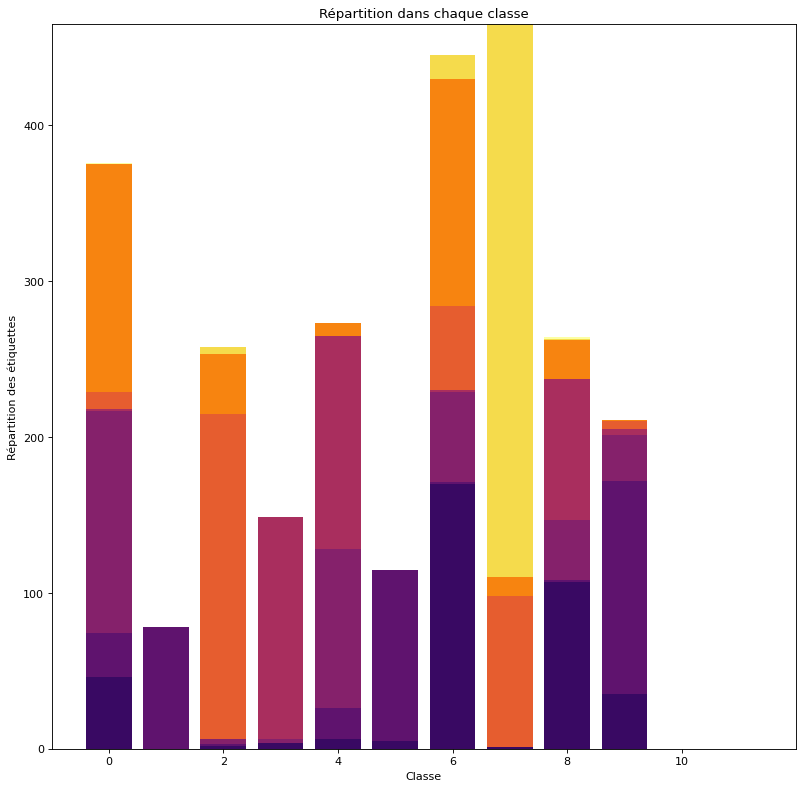

In [178]:
def BarPlotMat(M): 
# Fait un barplot pour chaque colonne de M.
# La couleur correspond à l'indice, la hauteur à la valeur
  I=M.shape[0]
  J=M.shape[1]
  ind = np.arange(J)
  haut = 0*M[0,:]
  for i in range(I):
    plt.bar(ind,M[i,:],bottom=haut,color=plt.cm.inferno(i/(I-1)))
    haut += M[i,:]
fig=plt.figure(num=3, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.clf()
BarPlotMat(conf_mat)
plt.xlabel('Classe')
plt.ylabel('Répartition des étiquettes')
plt.title('Répartition dans chaque classe')
